In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [3]:
# importing pandas module  
import pandas as pd  
      
# making data frame  
df = pd.read_csv("H:/S6/SAE 601/archive/ds_salaries.csv")  #création d'un dataframe avec panda
    
df.head(10) #on affiche les 10 premières lignes
        

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [4]:
# Répertoire cible dans votre projet
project_dir = r"H:/S6/SAE 601"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"H:/S6/SAE 601/archive/ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'H:/S6/SAE 601\\ds_salaries.csv'

In [5]:
# Lire le fichier depuis le répertoire du projet


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [6]:
#données manquantes 
missing_values_df = pd.DataFrame({'Variable': df.columns, 'Valeurs manquantes': df.isnull().sum()})
missing_values_df


,Variable,Valeurs manquantes
work_year,work_year,0
experience_level,experience_level,0
employment_type,employment_type,0
job_title,job_title,0
salary,salary,0
salary_currency,salary_currency,0
salary_in_usd,salary_in_usd,0
employee_residence,employee_residence,0
remote_ratio,remote_ratio,0
company_location,company_location,0


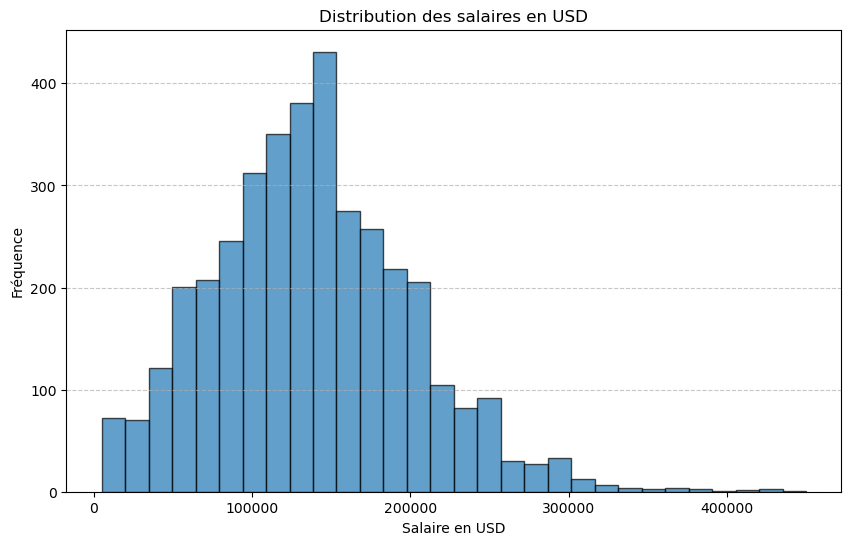

In [7]:
# Distribution des salaires en USD

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Salaire en USD')
plt.ylabel('Fréquence')
plt.title('Distribution des salaires en USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()

In [8]:
# liste des pays concerné par l'étude 
pays_concernés = df['company_location'].unique()
# Afficher la liste des pays
pays_concernés

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [9]:
#Salaire moyen par rôle
salaire_moyen_par_role = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False) #création variable
salaire_moyen_par_role
# Salaire moyen par pays
salaire_moyen_par_pays = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False) #création variable
salaire_moyen_par_pays
# Salaires moyens par niveau d'expérience
salaire_moyen_par_exp = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False) #création variable
salaire_moyen_par_exp

experience_level
EX    194930.929825
SE    153051.071542
MI    104525.939130
EN     78546.284375
Name: salary_in_usd, dtype: float64

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [10]:
# Filtrer les salaires pour un pays donné (ex : US)
salaire_us = df[df['company_location'] == input(int)]

# Afficher les premières lignes des données filtrées
salaire_us.head()

<class 'int'> US


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [11]:
# Top 5 des entreprises qui paient le plus
top_entreprises = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
top_entreprises

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64

In [18]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000

roles_salaire_eleve = df.groupby('job_title')['salary_in_usd'].mean() #création variable
roles_salaire_eleve = roles_salaire_eleve[roles_salaire_eleve > 100000].sort_values(ascending=False) #filtrage
roles_salaire_eleve

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
# Calcul de la proportion de télétravail par pays
remote_work_ratio = df[df['remote_ratio'] == 100]['company_location'].value_counts(normalize=True) * 100
# Trier par ordre décroissant pour trouver les pays avec la plus forte proportion
top_remote_countries = remote_work_ratio.sort_values(ascending=False)
# on affiche le résultat
top_remote_countries


company_location
US    81.010347
GB     3.956178
CA     2.799757
IN     1.825928
DE     1.521607
ES     1.399878
BR     0.791236
FR     0.730371
GR     0.608643
MX     0.547778
AU     0.426050
NL     0.365186
PL     0.304321
NG     0.304321
PT     0.243457
PR     0.243457
AR     0.182593
SI     0.182593
IE     0.182593
AS     0.121729
KE     0.121729
SG     0.121729
CH     0.121729
CF     0.121729
BE     0.121729
LU     0.121729
CZ     0.121729
AE     0.121729
EG     0.060864
SK     0.060864
CR     0.060864
FI     0.060864
CO     0.060864
TH     0.060864
SE     0.060864
PH     0.060864
ID     0.060864
HU     0.060864
EE     0.060864
MY     0.060864
UA     0.060864
DK     0.060864
TR     0.060864
CL     0.060864
JP     0.060864
HR     0.060864
PK     0.060864
IR     0.060864
IL     0.060864
Name: proportion, dtype: float64

In [13]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
remote_salaries = df[df['remote_ratio'] == 100]
salaire_moyen_remote = remote_salaries['salary_in_usd'].mean()
salaire_moyen_remote
# Comparer salaires moyens pour deux catégories
salaire_moyen_comparaison = df.groupby(df['remote_ratio'] == 100)['salary_in_usd'].mean()
salaire_moyen_comparaison.index = ['Présentiel/Hybride', '100% Télétravail']
salaire_moyen_comparaison


136481.45283018867

In [14]:
# Ajouter une colonne pour les fourchettes de salaires


bins = [0, 50000, 100000, 150000, 200000, 300000, df['salary_in_usd'].max()]
labels = ['<50K', '50K-100K', '100K-150K', '150K-200K', '200K-300K', '>300K']

# Ajouter une colonne avec la fourchette de salaire correspondante
df['salary_range'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, right=False)

# Afficher les premières lignes du dataset mis à jour
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50K-100K
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,<50K
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,<50K
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,150K-200K
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100K-150K
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L,200K-300K
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,100K-150K
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M,200K-300K
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M,100K-150K
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,100K-150K


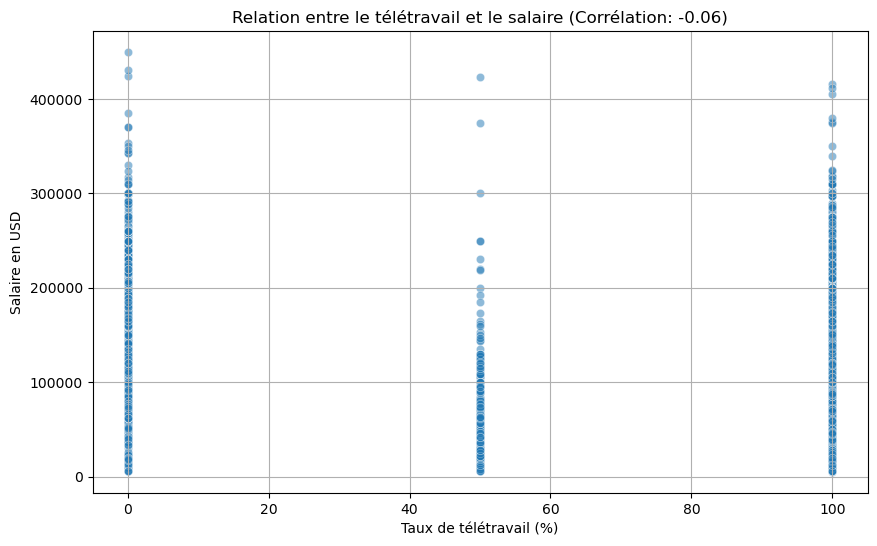

-0.06417098519057578

In [15]:
# Analyse des corrélations
# Relation entre télétravail et salaire
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la corrélation entre le taux de télétravail et le salaire en USD
correlation = df[['remote_ratio', 'salary_in_usd']].corr().iloc[0, 1]

# Création d'un nuage de points pour visualiser la relation entre télétravail et salaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['remote_ratio'], y=df['salary_in_usd'], alpha=0.5)
plt.xlabel("Taux de télétravail (%)")
plt.ylabel("Salaire en USD")
plt.title(f"Relation entre le télétravail et le salaire (Corrélation: {correlation:.2f})")
plt.grid(True)
plt.show()

# Affichage du coefficient de corrélation
correlation


In [16]:
# Salaire moyen par taille d'entreprise
salaire_moyen_par_taille = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
salaire_moyen_par_taille


company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64

In [17]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level', 
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='mean'
)

# Affichage du tableau croisé
print("Tableau croisé des salaires :", pivot_table)


Tableau croisé des salaires : remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
